# Geoscripting Exercise 12 GISRSArtists
## 22 January 2019

Imports

In [20]:
from geopy.geocoders import Nominatim
import rasterio
import rasterstats as rs
from owslib.wcs import WebCoverageService
from owslib.wfs import WebFeatureService
from python.createBoundingBox import createBoundingBox
from python.writeGeotiffToFile import writeGeotiffToFile
from python.getGeotiffFromWebCoverageService import getGeotiffFromWebCoverageService
from python.getDataFromWebFeatureService import getDataFromWebFeatureService
from python.calculateBuildingVolume import calculateBuildingVolume
from python.visualizeBuildingVolume import visualizeBuildingVolume
from python.geocodePlacenameToCoordinates import geocodePlacenameToCoordinates
from python.reproject import reproject

ModuleNotFoundError: No module named 'folium'

In [7]:
# get coordinates of Wageningen and reproject to RD New
wageningen = geocodePlacenameToCoordinates('Wageningen University')
x, y = reproject(wageningen, '4326', '28992')
print("coordinates: " + str(x) + ", " + str(y))

# create bounding box around Wageningen
bbox = createBoundingBox(x, y)
print("bbox: " + str(bbox))

# get wcs of Wageningen
url = 'http://geodata.nationaalgeoregister.nl/ahn2/wcs?service=WCS'
version = '1.0.0'
direc = 'data'
frmt = 'GEOTIFF_FLOAT32'
getGeotiffFromWebCoverageService(url, version, bbox, 
                                 'ahn2_05m_ruw', frmt, direc, 'AHN2_05m_DSM')
getGeotiffFromWebCoverageService(url, version, bbox, 
                                 'ahn2_05m_int', frmt, direc, 'AHN2_05m_DTM')


coordinates: 173994.1578792833, 444133.60329471016
bbox: (173494.1578792833, 443633.60329471016, 174494.1578792833, 444633.60329471016)


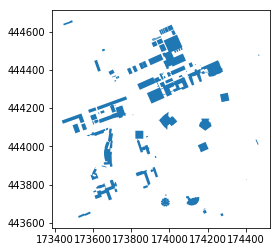

In [13]:
# get wfs of Wageningen
bgtURL = 'https://geodata.nationaalgeoregister.nl/beta/bgt/wfs'
bgtversion = '2.0.0'
typename = 'bgt:pand'
buildingsGDF = getDataFromWebFeatureService(bgtURL, bgtversion, bbox, typename)

%matplotlib inline 
buildingsGDF.plot() # pot to check if download succeeded

In [15]:
print(buildingsGDF.area.head())


0       8.619759
1    2365.662576
2    1906.590021
3     380.101205
4      12.450120
dtype: float64


In [19]:
# create heightmodel from difference DSM and DTM
DSM = rasterio.open("./data/AHN2_05m_DSM.tif", driver="GTiff")
DTM = rasterio.open("./data/AHN2_05m_DTM.tif", driver="GTiff")
buildingsHeight = DSM.read() - DTM.read()

# save to geotif
kwargs = DSM.meta # Copy metadata of rasterio.io.DatasetReader
writeGeotiffToFile(buildingsHeight, 'output', 'buildingsHeight', kwargs)

Help on function zonal_stats in module rasterstats.main:

zonal_stats(*args, **kwargs)
    The primary zonal statistics entry point.
    
    All arguments are passed directly to ``gen_zonal_stats``.
    See its docstring for details.
    
    The only difference is that ``zonal_stats`` will
    return a list rather than a generator.

